Regressions are a supervised model that predicts numbers based on infinitely many known inputs and outputs.  Regressions use the known inputs and outputs to identify variable coefficients for the function that will define the predictive model.

Regressions use the following equation:  Ax=B, where:

* A:  Design Matrix [n x m]
* x:  Coefficient Vector [m x 1]
* B:  Prediction Vector [n x 1]


Regression Model Terminology:

* Training Set: Data used to train a model

* f = model

* x = input variable, aka feature

* y = output variabnle, aka target

        (x, y) = single training example

        (x^i, y^i) = i-th training example (a specific data row in the data set) - NOT an exponent!

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def get_circle_regression_matrices(x, y):

    #  Design Matrix
    A = []
    for idx, val in enumerate(x):
        x_ = -2*x[idx]
        y_ = -2*y[idx]

        row = [x_, y_, 1]
        A.append(row)

    #  Response Vector
    B = []
    for idx, val in enumerate(y):
        row = [(-x[idx]**2)-(y[idx]**2)]
        B.append(row)

    return A, B

Matrix A defines the design matrix.  

Matrix B defines the prediction matrix

Vector x is the coefficient vector and can be solved for:

* Ax = B

* A^T*Ax = A^T*B

* (A^TA)^-1*(A^T*Ax) = (A^TA)^-1*(A^T*B)

* x = (A^TA)^-1*(A^T*B)

In [11]:
def get_coefficient_vector(A, B):

    A_t = np.transpose(A)
    A_tA =A_t@A
    A_tB = A_t@B

    coeff_vector = np.linalg.inv(A_tA)@A_tB

    return coeff_vector

In [12]:
def get_prediction_vector(coeff_vector):

    x0 = coeff_vector[0]
    y0 = coeff_vector[1]
    b = coeff_vector[-1]


    rfit = np.sqrt(x0**2+y0**2-b)
    angle_ = np.linspace(0, 2 * np.pi, 360)


    xfit=[]
    yfit=[]
    for idx, theta in enumerate(angle_):
        x_= rfit * np.cos(theta)+x0
        y_=rfit * np.sin(theta)+y0

        xfit.append(x_)
        yfit.append(y_)


    return xfit, yfit

In [13]:
def plot_regression(x, y, xfit, yfit):
    
    plt.axis('equal')
    plt.scatter(x, y, c='purple')
    plt.plot(xfit, yfit, 'r')
    plt.grid(True)


    plt.show()

In [14]:
def main(x, y):
    A, B = get_circle_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    xfit, yfit = get_prediction_vector(coeff_vector)
    plot_regression(x, y, xfit, yfit)

Generate random data to run regression

In [15]:
center_x = 0
center_y = 0
min_radius = 75 #75
max_radius = 100  #100
num_points = 50  #50

r = np.random.uniform(min_radius, max_radius, num_points)
angle = np.random.uniform(0, 2 * np.pi, num_points)

x = []
y = []
for idx, theta in enumerate(angle):

    x_val = int(r[idx] * np.cos(theta) + center_x)
    y_val = int(r[idx] * np.sin(theta) + center_y)

    x.append(x_val)
    y.append(y_val)

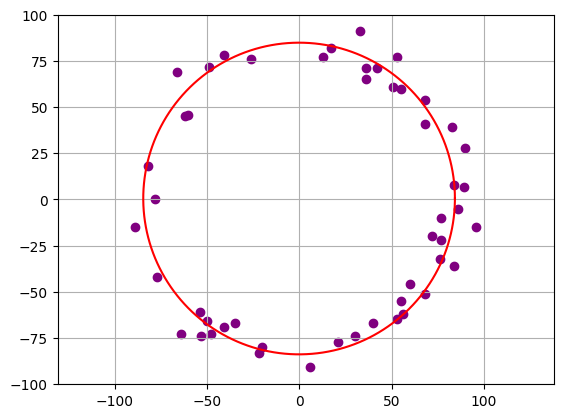

In [16]:
main(x, y)